In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys


#### 실습 (CNN) 
https://hunkim.github.io/ml/

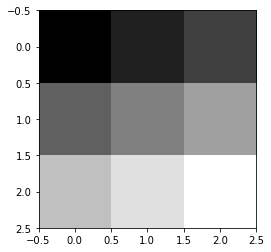

In [6]:
image = np.array([[[[1], [2], [3]],
                    [[4], [5], [6]],
                    [[7], [8], [9]]]],dtype=np.float32)
image.shape
# 4차원으로 데이터 준비

# 숫자를 이미지로 시각화
plt.imshow(image.reshape(3,3),cmap="Grays") # 2차원으로 넘겨줘야 한다.

In [9]:
# padding없이 convolution layer 추출

filter = tf.constant([[[[[1.]], [[1.]]], 
                       [[[1.]], [[1.]]]]]) # 4차원으로 해야 함
filter.shape()
conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding="SAME") 
# SAME: 가로세로 똑같이 
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    one_img.reshpae(3,3)
    plot.subplot(1,2,i+1)
    plot.imshow(one_img.reshape(3,3), cmap="Grays")

TypeError: 'TensorShape' object is not callable

In [ ]:
# 3개의 필터 사용(2*2*1*3)

filter = tf.constant([[[[[1.,10, -1]], [[1., 1-, -1]]], 
                       [[[1.,10, -1]], [[1.,10, -1]]]]]) # 4차원으로 해야 함
filter.shape()
conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding="SAME") 
# SAME: 가로세로 똑같이 
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    one_img.reshpae(3,3)
    plot.subplot(1,3,i+1)
    plot.imshow(one_img.reshape(3,3), cmap="Grays")

In [ ]:
# MaxPooling(2*2)

image2 = tf.constant([[[[4],[3]],
                      [[2], [1]]]])

pool = tf.nn.max_pool(image2, ksize=[1,2,2,1], strides=[1,1,1,1],
                     padding="VALID") # 앞뒤 1은 모양 맞추기 위한 것
                                                # 실제 값은 가운데 2, 2이다.
sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

#### MNIST를 이용한 CNN

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_set("../Acorn machine learining/MNIST_data/",one_hot=True)

In [ ]:
# 데이터 확인
img = mnist.train.images[0]
img.shape
plt.imshow(img,reshape(28,28))

In [ ]:
# 입력값 준비 
X = tf.placeholder(tf.float32, shape=[None,784])
y = tf.placeholder(tf.float32, shape=[None,10])

In [ ]:
# first Convolution layer 준비

# 필터(가중치) : 크기는 3*3, 개수는 32, 색상은 1
# 텐서에 이미지를 4차원으로 넣어줘야 한다.
# 28*28 크기의 4차원 데이터로 만듬

X_img = tf.reshape(X, [-1, 28,28, 1]) # 1차원 --> 4차원,
# 28x28x1 행렬을 무한개수(-1)로 정의
W1 = tf.variable(tf.random_normal([3,3,1,32], stddev=0.01))
# stddev=0.01 랜덤 범위 지정, 3*3크기에 색상 1, 개수 32개 만듬

L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME') 
# padding안 할 때는 VALID
print(L1)

L1 = tf.nn.relu(L1)
print(L1)

# pooling 작업
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME") 
# ksize=[1,2,2,1] :필터는 2*2크기로


In [ ]:
# second Convolution layer 준비
# 필터 : 크기는 3*3, 개수 : 64개 색상 : 1

W2 = tf.variable(tf.random_normal([3,3,32,64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME') 
print(L2)
L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME") 
print(L2) # 최종 입력값

In [ ]:
# ================= Fully Connected Layer (Dense Layer)===============

# hyper parameter 준비
learning_rate = 0.01
training_epochs = 20
batch_size = 500

#  tensorflow graph 작성
L2 = tf.reshape(L2, [-1, 7*7*64]) # 입력데이터 2차원으로 맞춰서 넣어줘야 한다.
W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b3 = tf.Variable(tf.random_normal([10]))

# 비용(loss) 계산
logit = tf.matmul(L2, W3) + b3
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=y))

# 최저 비용(loss) 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimizer(cost)

# === tensor graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict = {X:batch_xs, y:batch_ys})
        avg_cost += c / total_batch
        
    print("Epoch :","%0.4d"%(epoch + 1), "cost=","{:.9f}".format(avg_cost))

In [ ]:
# 정확도

is_correct = tf.equal(tf.argmax(logit,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도 :", sess.run(accuracy, feed_dict={X:mnist.test.images,
                                            y:mnist.test.labels}))

#### Deep FC

+ 레이어 총 3개 사용, 입출력 개수 128개 사용
+ xavier 초기화
+ dropout 사용
+ training_epoch : 15
+ batch_size : 100
+ 

In [ ]:
### hyper parameter 준비
learning_rate = 0.001
training_epochs = 15
batch_size = 100
prob = tf.placeholder(tf.float32)

### 첫번째 레이어
L3 = tf.reshape(L2, [-1, 7*7*64])

W3 = tf.get_variable("W3", shape=[7*7*64, 128], 
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([128]))
logit3 = tf.matmul(L3, W3) + b3
L3 = tf.nn.relu(logit3)
L3 = tf.nn.dropout(L3, keep_prob=prob)

### 두번째 레이어
W4 = tf.get_variable("W4", shape=[128, 128], 
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([128]))
logit4 = tf.matmul(L3, W4) + b4
L4 = tf.nn.relu(logit4)
L4 = tf.nn.dropout(L4, keep_prob=prob)

### 세번째 레이어
W5 = tf.get_variable("W5", shape=[128, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logit5 = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit5,
                                                                labels=y))

# 최저 비용 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### tensor graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys,
                                                 prob:0.7})
        avg_cost += c/total_batch
        
    print("Epoch:", "%04d"%(epoch+1), "cost=", "{:.9f}".format(avg_cost))
   

 ### 정확도
is_correct = tf.equal(tf.argmax(logit5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images,
                                             y:mnist.test.labels, prob:1}))

### 교통 표지판 인식
+ http://benchmark.ini.rub.de

+ 이미지(32*32) --> conv Layer1(pooling) --> Conv Layer2(pooling) --> FC

#### 이미지 전처리

In [2]:
import glob
from skimage.color import rgb2lab # rgb2lab :색상 단순화
from skimage.transform import resize # 이미지 크기 조정
from collections import namedtuple
np.random.seed(101) # 랜덤값 고정

In [3]:
# 상수 정의

N_CLASSES = 43
RESIZED_IMAGE = (32,32)

In [4]:
# 정답 y는 43개

Dataset = namedtuple("Dataset", ["X", "y"]) # X, y 추가
dir(Dataset)
# namedtuple : dict와 같은 기능이나 읽기 전용이다.


['X',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'index',
 'y']

In [36]:
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)
    # 열기준으로 stack을 이용하여 쌓아줌  
    # images = imgs, 

# 이미지 크기를 재조정하고 색상은 회색조로 변경, 원핫인코딩
def read_dataset_ppm(rootpath, n_labels, resized_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = rootpath + "/" + format(c, '05d') + "/"
        # 0으로 5자리 채우고 c 더함
        # print(full_path)
        for img_name in glob.glob(full_path +"*.ppm"): # 폴더 안 파일 개수만큼 반복 
            img = plt.imread(img_name).astype(np.float32) # 이미지를 숫자로 읽어옴
            # print(img)
            # break
            img = rgb2lab(img/255.0)[:, :, 0] # rgb 색상을 lab형으로 변경
            # print(img) # 값이 전보다 작아진것을 확인
            # break
            
            img = resize(img, resized_to, mode="reflect") 
            # 크기 바꿀 이미지 넘겨주고, 이미지 크기, 모드는 reflect로 
            
            label = np.zeros((n_labels,),dtype=np.float32)
            label[c] = 1.0 # c에 해당하는 자리에만 1로 채우고 나머지 0으로
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X=to_tf_format(images), y=np.array(labels)) 
                    # X값을 4차원으로 받기 

ds = read_dataset_ppm("../Acorn machine learning/GTSRB/Final_Training/Images",
                N_CLASSES, RESIZED_IMAGE)

print(ds.X.shape)
print(ds.y.shape)

(39209, 32, 32, 1)
(39209, 43)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


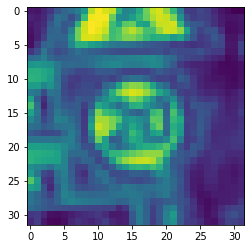

In [6]:
# 데이터 확인
plt.imshow(ds.X[0,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[0,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


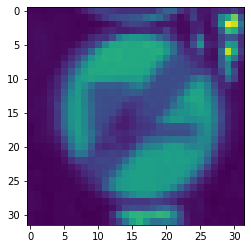

In [7]:
plt.imshow(ds.X[-1,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[-1,:])

In [10]:
# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split

# X_train, X_teset, y_train,y_test = train_test_split(range(ds.X.shape[0]), ds.y, 
#                                                    test_size=0.25, 
#                                                    random_state=101)
# np.array(X_train).shape 
# 
# 위에 방법이 아닌 아래의 방법으로 학습데이터를 분리한다.
idx_train, idx_test = train_test_split(range(ds.X.shape[0]), test_size=0.25, 
                                       random_state=101)
                                                   
X_train = ds.X[idx_train, :, :, :]                                                   
X_test = ds.X[idx_test, :, :, :]
y_train =  ds.y[idx_train, :] 
y_test =  ds.y[idx_test, :] 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


#### 훈련(학습)과 예측

In [58]:
# 미니ㅣ배치 준비

def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0] # assert : 
    n_samples = X.shape[0] # 29406개의 데이터 가져옴
    
    if shuffle:
        idx = np.random.permutation(n_samples) # 데이터 인덱스 순서를 바꿔줌
        
    else:
        idx = list(range(n_samples))
        
    for i in range(int(np.ceil(n_samples/batch_size))): 
        # ceil은 소수점 자리의 숫자를 무조건 올리는 함수
        from_idx = i * batch_size
        to_idx = (i + 1) * batch_size # 0~10000, 10001~20000, 20001~나머지
        
        yield X[idx[from_idx : to_idx], :, :, :], y[idx[from_idx : to_idx], :]
        # yield : return과 비슷하나 반환할 값이 아예 없을 때까지 계속 같은 과정을 반복
        

In [59]:
# 미니배치 함수 테스트
for  i in minibatcher(X_train, y_train, 10000, True): 
    print(i[0].shape, i[1].shape)
# 배치 사이즈 10000개, True는 데이터를 섞어 준다는 것

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


In [60]:
def fc_ro_activation_layer(in_tensors, n_units):
    W = tf.get_variable("fc_W", shape=[in_tensors.get_shape()[1],n_units], 
                     initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("fc_b", shape=[n_units],
                        initializer=tf.constant_initializer(0,0)) # 0 으로 초기화
    
    return tf.matmul(in_tensors,W) + b

In [61]:
def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_ro_activation_layer(in_tensors, n_units))
    # leaky_relu :0보다 작은 값도 가져옴

In [62]:
def conv_layer(in_tensors, kernel_size, n_units): # convolution layer
    # kernel_size :filter 크기
    W = tf.get_variable("conv_W", [kernel_size,kernel_size,
                                  in_tensors.get_shape()[3], n_units], 
                     initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("fc_b", shape=[n_units],
                        initializer=tf.constant_initializer(0,0)) # 0 으로 초기화
    return tf.nn.conv2d(in_tensors, W, strides=[1,1,1,1], padding='SAME') + b 

#*****패딩이란
# 입력된 데이타 행렬 주위로, 무의미한 값을 감싸서 원본 데이터의 
# 크기를 크게 해서, 필터를 거치고 나온 특징 행렬의 크기가 작아지는 것을 방지한다

In [63]:
def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, ksize=[1,sampling,sampling,1],
                          strides=[1,sampling,sampling,1], padding="SMAE")

In [64]:
def dropout(in_tensors, keep_prob, is_training): 
    # is_training :훈련중인지 아닌지 구별할 인자
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors,keep_prob),
                  lambda:in_tensors)

#### Model Specitication

+ 2차원 convolution 5 * 5, 32 필터
+ 2차원 convolution 5 * 5, 64 필터
+ 평면화 계층 
+ Full Connected Layer, 입출력 개수 : 1024개의 unit
+ Dropout 40%
+ Softamx

In [65]:
# 모델링

def model(intensors, is_training):
    # First Layer : 5*5 Convolution layer, 32개 필터, 2x maxpool, 20% dropout
    with tf.variable_scope("L1"):
        l1 = conv_layer(in_tensors, kernel_size=5, n_units=32)
        l1 = maxpool_layer(l1, 2) # sampling = 2
        # 한줄 코드
        # 1l = maxpool_layer(conv_layer(in_tensors, 5, 32),2)
        l2_out = dropout(l1, 0.8, is_training)
        
    # Secon Layer: 5*5 Convolution layer, 64개 필터, 2x maxpool, 20% dropout
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(in_tensors, 5, 64),2)
        l2_out = dropout(l2,0.8, is_training)
        
    # Flat Layer : 평면화
    with tf.variable_scope("flatten"):
        l2_out_flat = tf.layers.flatten(l2_out)
    
    
    # Fully Connected Layer, 1024 neurons, 40% dropot
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, n_units=1024)
        l3_out = dropout(l3, 0.6, is_training)
        
    # Output
    with tf.variable_scope("out"):
        out_tensors = fc_ro_activation_layer(l3_out, N_CLASSES) # N_CLASSES은 위에 43이라고 정의
        
    return out_tensors

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
def train_model(X_train, y_train, learning_rate, max_epochs, batch_size):
    # in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None,32,32,1))
    # shape=[] 사용가능
    
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None,RESIZED_IMAGE[0],
                                                           RESIZE_IMAGE[1],1))
    # 훈련데이터 : 29406개수 정해주거나 None, 원본 크기: 32*32, 색상 : 1
    in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
    
    # 훈련 여부
    is_training = tf.placeholder(tf.bool)
    
    # 모델함수 호출
    logit = model(in_X_tensors_batch, is_training)
    
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=in_y_tensors_batch))

    # 최저 비용 구하기
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variable_initializer())
        
        for epoch in range(max_epochs):
            print("Epoch = ", epoch)
            tf_score = []
            
            for mb in minibatcher(X_train, y_train,batch_size, shuffle=True):
                sess.run([train, cost], feed_dict={in_X_tensors_batch : mb[0],
                                                   in_y_tensors_batch :mb[1],
                                                   is_training:True})
                tf_score.append(c)
                
            print("train loss score : ",np.mean(tf._score))
            
        # 훈련이 끝난 후 테스트
        print("TEST SET PERFORMANCE")

        out_y_pred = tf.nn.softmax(logit) # 예측값 : ligit
        sess.run([out_y_pred, cost], feed_dict={in_X_tensors_batch : X_test,
                                    in_y_tensors_batch : y_test,
                                    is_training:False})
        print(" test_loss_score=", test_cost)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))

        cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.tight_layout()
        plt.show()

        # And the log2 version, to enphasize the misclassifications
        plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
        plt.colorbar()
        plt.tight_layout()
        plt.show()


In [68]:
tf.reset_default_graph() # tensorflow 1.x버전에서만 작동됨
train_model(X_train, y_train, 0.001, 10, 256) 
# 훈련데이터, learning_rate, max_epochs, batch_size


AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

In [ ]:
"""
1. 일부 CNN, FC계층을 추가/삭제를 통해서 성능이 어떻게 변하는지 확인
2. dropout의 비율을 변경해보면서 결과가 과소적합 또는 과대적합 되는지 확인
3. epoch 개수와 batch size도 변경해서 결과 확인
4. 실제 테스트 이지를 통해 사용할 수 있는 프로그램
"""